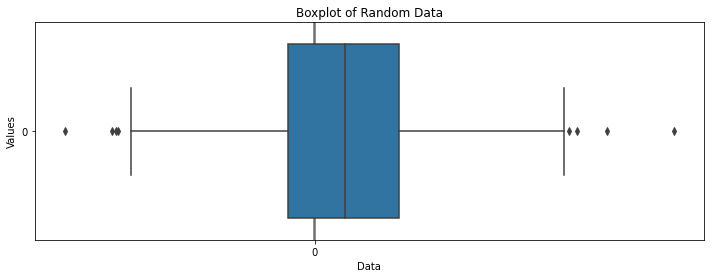

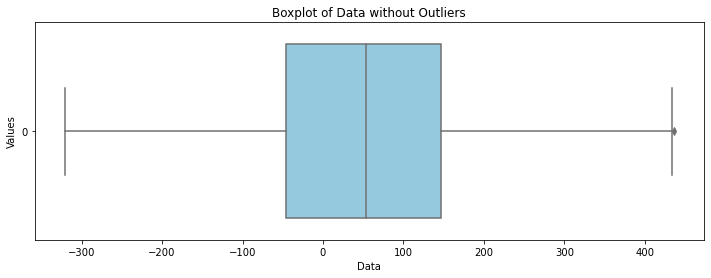

Outliers that were removed: [-342.96176561  458.02537499  627.9097236  -436.19010101  511.83212127
 -354.53299644 -347.64547126  444.85730973]
Descriptive statistics after outlier removal


,value
count,992.000000
mean,52.760599
std,141.960744
min,-320.746675
25%,-45.937739
50%,53.795092
75%,146.810451
max,436.003970


In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Generate a random sample of values
np.random.seed(42)
data = np.random.normal(loc=50, scale=150, size=1000)

# Draw the initial boxplot
plt.figure(figsize=(12, 4))
sns.boxplot(data=data, color='skyblue')
plt.title('Boxplot of Random Data')
plt.xlabel('Data')
plt.ylabel('Values')

# Calculate IQR
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Determine outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (data < lower_bound) | (data > upper_bound)

# Draw swarmplot with different colors for outliers
# Use larger markers for outliers
#sns.swarmplot(x=data, size=5, edgecolor='black', linewidth=1,
#              palette=np.where(outliers, 'red', 'black'), marker='o')
sns.boxplot(data=data,orient = 'h')

# Show the plot
plt.show()

# Remove outliers
data_cleaned = data[~outliers]

# Draw boxplot without outliers
plt.figure(figsize=(12, 4))
sns.boxplot(data=data_cleaned, color='skyblue',orient = 'h')
plt.title('Boxplot of Data without Outliers')
plt.xlabel('Data')
plt.ylabel('Values')
plt.show()
print(f'Outliers that were removed: {data[outliers]}')


# Convert cleaned data to a Pandas Series to use describe()
data_cleaned_series = pd.Series(data_cleaned)

# Print descriptive statistics
print('Descriptive statistics after outlier removal')
display(pd.DataFrame(data_cleaned_series.describe()).rename(columns={0:'value'}))